In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [4]:
tesla_df = pd.read_csv('Tesla Stock Price (2010 to 2023).csv')

In [5]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3162 non-null   object 
 1   Open       3162 non-null   float64
 2   High       3162 non-null   float64
 3   Low        3162 non-null   float64
 4   Close      3162 non-null   float64
 5   Adj Close  3162 non-null   float64
 6   Volume     3162 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 173.0+ KB


In [6]:
tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29/06/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,30/06/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,01/07/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,02/07/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,06/07/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [15]:
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'], format='%d/%m/%Y')


In [16]:
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

In [18]:
print(f'Dataframe contains stock prices between {tesla_df.Date.min()} {tesla_df.Date.max()}')
print(f'Total days = {(tesla_df.Date.max() - tesla_df.Date.min()).days} days')

Dataframe contains stock prices between 2010-01-07 00:00:00 2023-12-01 00:00:00
Total days = 5076 days


In [19]:
tesla_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3.162000e+03
mean,59.090024,60.415403,57.622371,59.039845,59.039845,9.394769e+07
std,95.550672,97.746213,93.067484,95.420232,95.420232,8.175154e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.037333,9.252500,8.828500,9.066833,9.066833,4.243012e+07
50%,16.294334,16.514666,16.016334,16.295666,16.295666,7.609725e+07
75%,24.965833,25.212667,24.438666,24.986833,24.986833,1.179720e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


<Axes: >

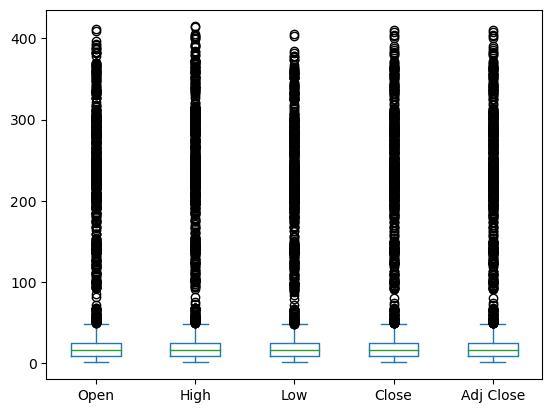

In [20]:
tesla_df[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

In [24]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Assuming you have already loaded your data into the tesla_df DataFrame

# Create a Scatter trace using the Date and Close columns from the DataFrame
scatter_trace = go.Scatter(x=tesla_df['Date'], y=tesla_df['Close'], mode='lines', name='Tesla Stock Price')

# Define the layout
layout = go.Layout(
    title='Stock Price of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# Create the Plotly figure with the Scatter trace and layout
tesla_data = [{'x':tesla_df['Date'], 'y':tesla_df['Close']}]
plot = go.Figure(data=[scatter_trace], layout=layout)




In [25]:
# Display the plot
iplot(plot)

In [27]:
#Building the regression model


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [31]:
# Split the dataset into train and test sets
X = np.array(tesla_df.index).reshape(-1,1)
Y = tesla_df['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [32]:
# Featuring Scaling
scaler = StandardScaler().fit(X_train)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [40]:
# Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data = tesla_data, layout=layout)

In [41]:
iplot(plot2)

In [44]:
# Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.5249849943848611	0.5228202551920504
MSE       4146.705564740744	0.5228202551920504

